In [1]:
import requests_cache
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import random
%matplotlib inline

# allow for full view of output
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# set cache
requests_cache.install_cache("cache")

In [2]:
draft_years = list(range(2000,2018)) # create list of draft years
draft_years = [str(year) for year in draft_years] # convert draft years to strings for URL purposes

def NBA_draft(years):
    """
    Purpose:
    This function scrapes the basketball-reference NBA draft pages and extracts the player data
    
    Args:
    (years) : list of the draft years
    
    Returns:
    (NBAdraft_df) : dataframe of all NBA draft picks since the year 2000
    """
    NBAdraft_list = [] # initialize empty list
    for draft_year in years:
        url = "https://www.basketball-reference.com/draft/NBA_" + draft_year + ".html" # NBA draft year page
        table = pd.read_html(url, header=1) # read in html table as a list
        
        table_df = pd.DataFrame(table[0]) # convert to dataframe
        table_df1 = table_df[~table_df.Player.str.contains("Round", na = False)] # drop round rows
        table_df2 = table_df1[~table_df1.Player.str.contains("Player", na = False)] # drop excess headers
        final_table = table_df2.reset_index(drop = True) # reset the index due to the drops
        final_table.insert(loc = 0, column = 'Draft_Year', value = draft_year) # insert a draft year column
        NBAdraft_list.append(final_table) # append to list of dataframes
    NBAdraft_df = pd.DataFrame(pd.concat(NBAdraft_list)) # combine the list of dataframes into a single dataframe
        
    return(NBAdraft_df)

In [3]:
NBAdraft = NBA_draft(draft_years)
NBAdraft = NBAdraft.apply(pd.to_numeric, errors='ignore')
NBAdraft

,Draft_Year,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,2000,1,1.0,NJN,Kenyon Martin,University of Cincinnati,15.0,757.0,23134.0,9325.0,...,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.7,15.5
1,2000,2,2.0,VAN,Stromile Swift,Louisiana State University,9.0,547.0,10804.0,4582.0,...,0.074,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2
2,2000,3,3.0,LAC,Darius Miles,NaN,7.0,446.0,11730.0,4507.0,...,0.168,0.590,26.3,10.1,4.9,1.9,9.5,0.039,-1.2,2.3
3,2000,4,4.0,CHI,Marcus Fizer,Iowa State University,6.0,289.0,6032.0,2782.0,...,0.191,0.691,20.9,9.6,4.6,1.2,2.7,0.022,-4.7,-4.1
4,2000,5,5.0,ORL,Mike Miller,University of Florida,17.0,1032.0,27812.0,10973.0,...,0.407,0.769,26.9,10.6,4.2,2.6,60.7,0.105,0.9,20.3
5,2000,6,6.0,ATL,DerMarr Johnson,University of Cincinnati,7.0,344.0,5930.0,2121.0,...,0.336,0.789,17.2,6.2,2.2,0.9,6.4,0.052,-1.6,0.6
6,2000,7,7.0,CHI,Chris Mihm,University of Texas at Austin,8.0,436.0,8758.0,3262.0,...,0.231,0.704,20.1,7.5,5.3,0.5,13.3,0.073,-3.8,-4.1
7,2000,8,8.0,CLE,Jamal Crawford,University of Michigan,18.0,1249.0,37448.0,18766.0,...,0.349,0.862,30.0,15.0,2.3,3.4,60.6,0.078,-0.9,10.3
8,2000,9,9.0,HOU,Joel Przybilla,University of Minnesota,13.0,592.0,11733.0,2293.0,...,0.000,0.557,19.8,3.9,6.2,0.4,23.0,0.094,-0.9,3.3
9,2000,10,10.0,ORL,Keyon Dooling,University of Missouri,13.0,728.0,14134.0,5067.0,...,0.349,0.799,19.4,7.0,1.3,2.2,18.5,0.063,-3.0,-3.6


In [4]:
# set stop words for wordcloud
stop_words = set(STOPWORDS)
stop_words.add("University")
stop_words.add("State")

In [13]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    """
    Purpose : Change the color of the words in the word cloud to grey scale 
    """
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 100)


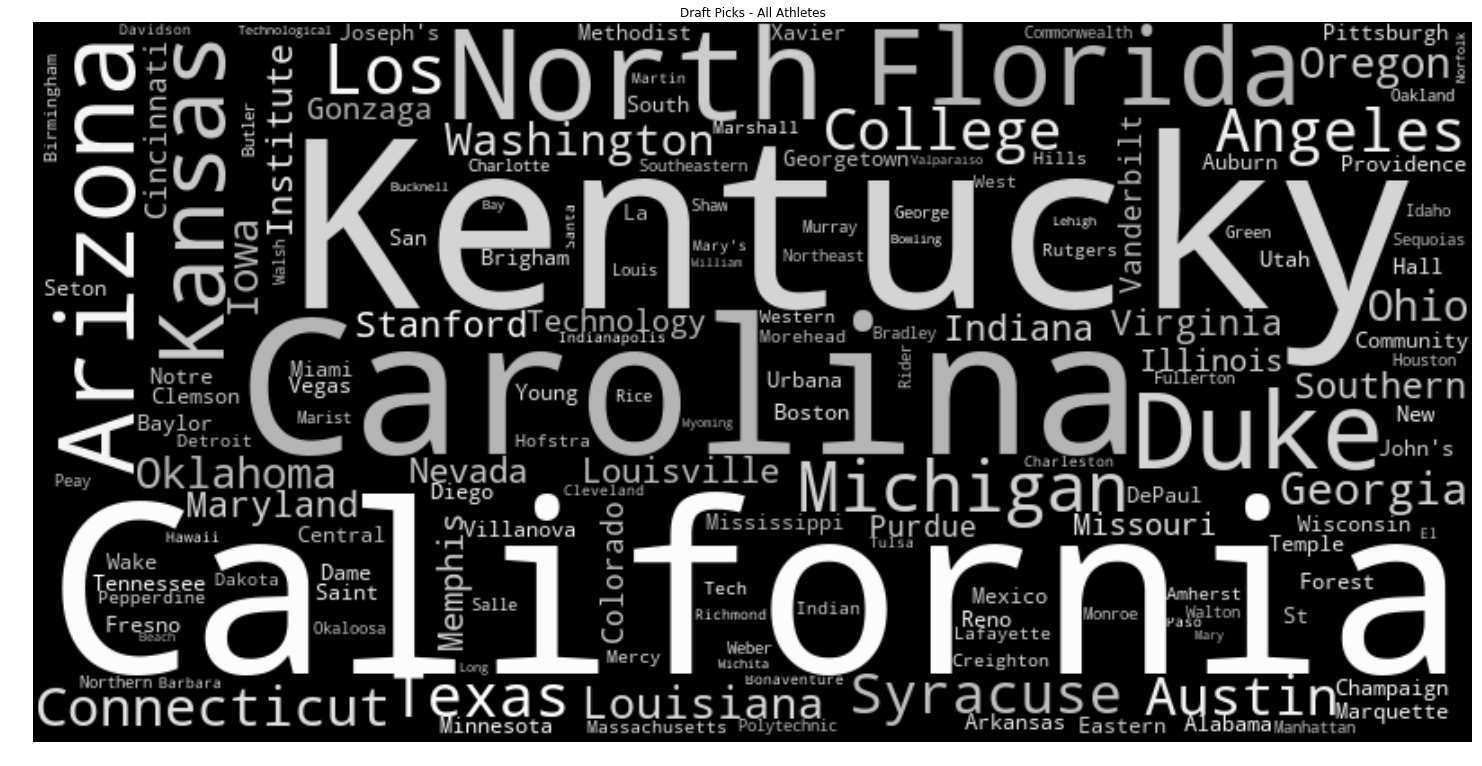

In [19]:
all_player_df = pd.DataFrame(list(NBAdraft["College"].dropna()), columns = ["College"]) # All players

all_player_cloud = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 800, height = 400)
all_player_cloud.generate(" ".join(all_player_df["College"]))
plt.figure(figsize = (20,10))
plt.imshow(all_player_cloud.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Draft Picks - All Athletes")
plt.show()

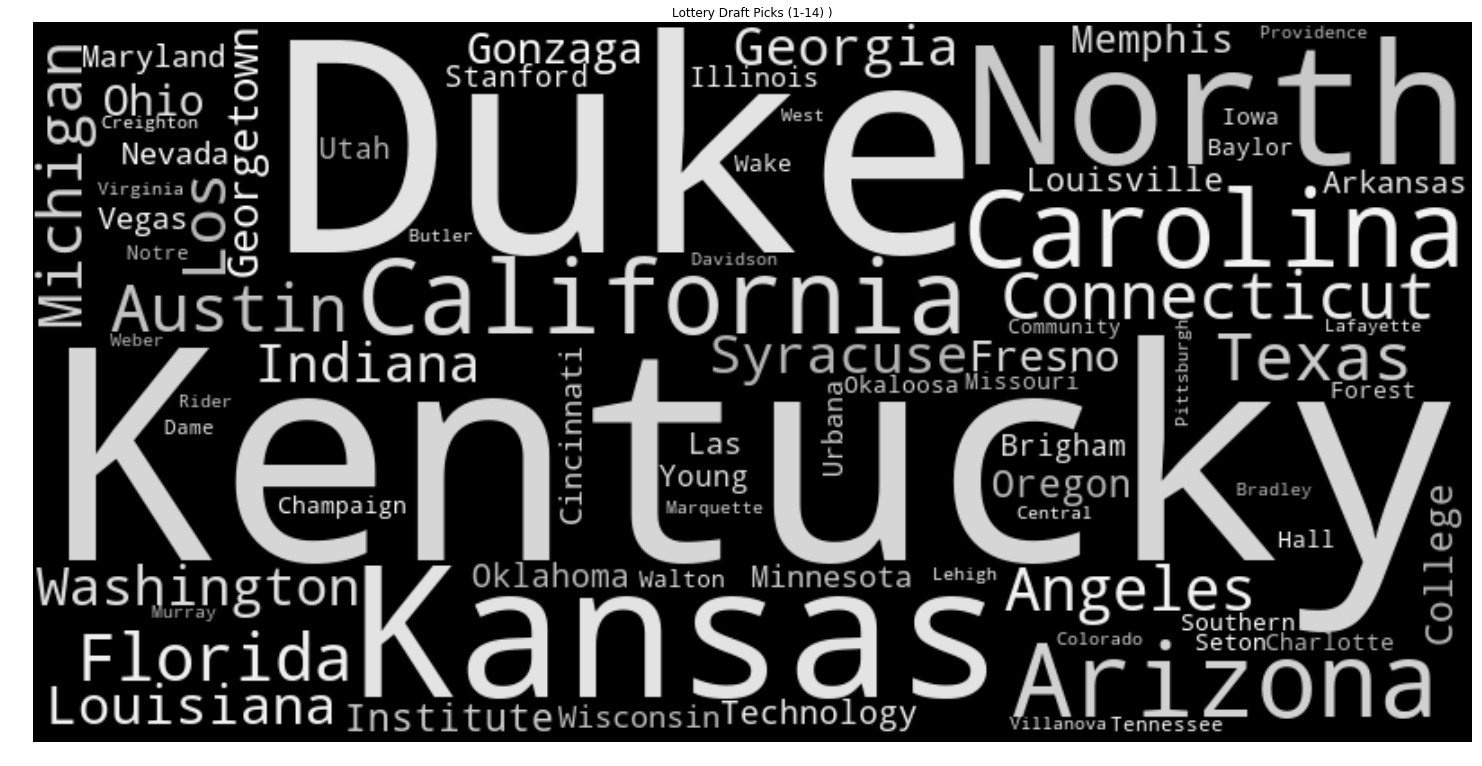

In [18]:
# filter top 14 (lottery)picks each year
lottery_player_df = NBAdraft[NBAdraft["Pk"].between(1, 14, inclusive=True)] 

# lottery player df
lottery_college_df = pd.DataFrame(list(lottery_player_df["College"].dropna()), columns = ["College"])


lottery_player_cloud = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 800, height = 400)
lottery_player_cloud.generate(" ".join(lottery_college_df["College"]))
plt.figure(figsize = (20,10))
plt.imshow(lottery_player_cloud.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Lottery Draft Picks (1-14) )")
plt.show()

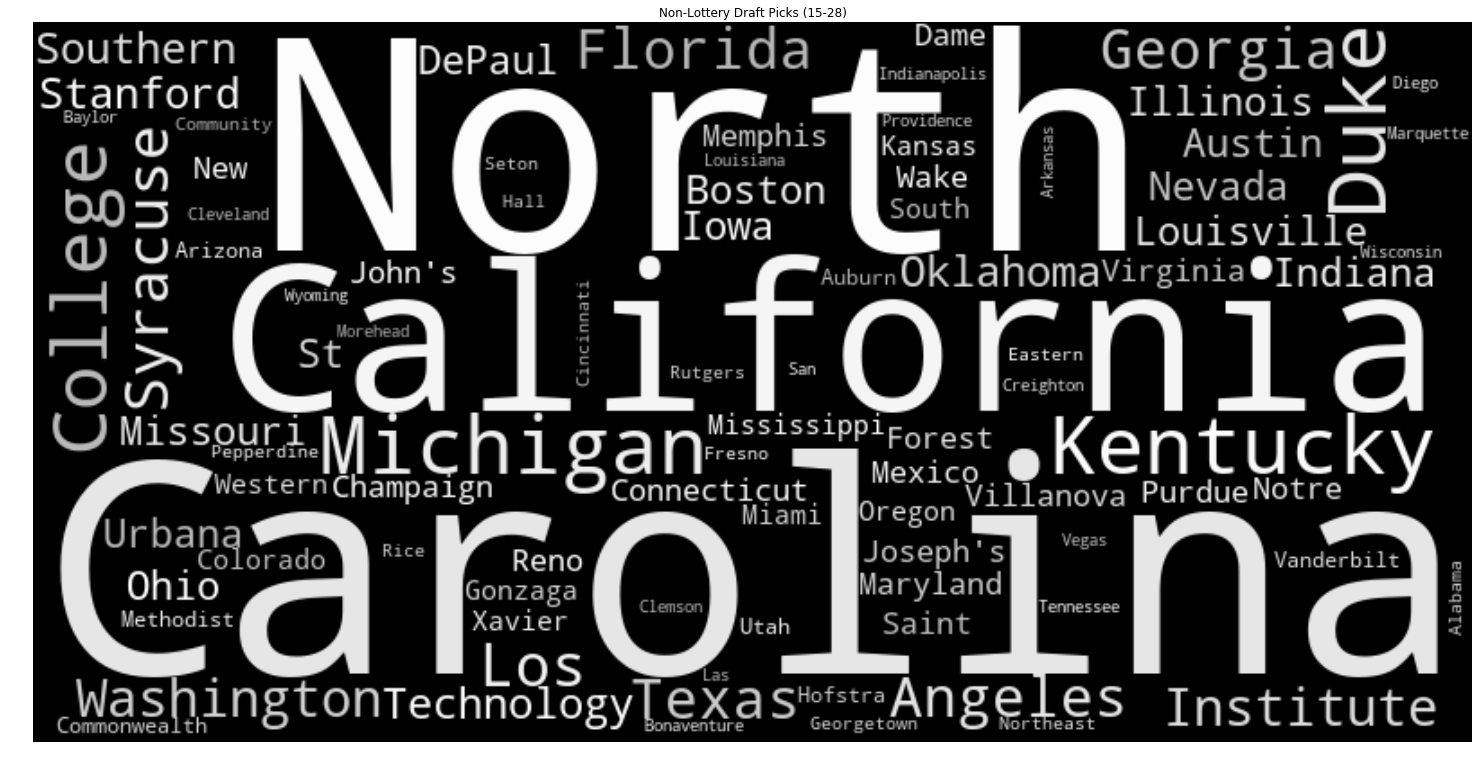

In [17]:
# filter out next 14 picks (15-28)
non_lottery_player_df = NBAdraft[NBAdraft["Pk"].between(15, 28, inclusive=True)] 

# non-lottery player df
non_lottery_college_df = pd.DataFrame(list(non_lottery_player_df["College"].dropna()), columns = ["College"])

non_lottery_player_cloud = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 800, height = 400)
non_lottery_player_cloud.generate(" ".join(non_lottery_college_df["College"]))
plt.figure(figsize = (20,10))
plt.imshow(non_lottery_player_cloud.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Non-Lottery Draft Picks (15-28)")
plt.show()